# Занятие 1. Классификация сигналов: аналоговые, дискретные, цифровые.

In [13]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot

## Задача 1.1. Дискретизация и квантование.

In [14]:
import numpy as np                # импорт бибилиотеки numpy
import matplotlib.pyplot as plt   # импорт модуля matplotlib.pyplot
from my_lib import *

| Варианты: |   1 |    2 |    3 |   4 |    5 |    6 |    7 |    8 |    9 |   10 |   11 |   12 |
|:---------:|----:|-----:|-----:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|     **N**     |  15 |   20 |   30 |  12 |   15 |   30 |   25 |   18 |   10 |   25 |   20 |   15 |
|   $f_0$**, Гц**   | 200 |  250 |  400 | 200 |  600 |  750 | 1200 |  600 |  400 |  500 |  800 |  400 |
|   $f_s$**, Гц**   | 500 | 1250 | 2000 | 600 | 1500 | 3750 | 6000 | 1800 | 1000 | 2500 | 4000 | 1200 |

Промоделировать дискретизацию и квантование синусоидального сигнала $x(t)=\sin(2\pi f_0 t)$ с частотой дискретизации $f_s$. Пронаблюдать эффекты во временной области для отрезка сигнала из $N$ отсчетов. 

1) Как соотносится растояние между отсчетами по оси времени с частотой дискретизации?

2) Как изменяется абсолютная ошибка квантования $\varepsilon[k]=|x[k]-y[k]|$ с ростом числа уровней квантования?

In [15]:
N=25                                    # Число отсчетов по времени
f0=500.0                                # Частота синусоиды в Гц
fs=2500.0                               # Частота дискретизации в Гц
k=np.arange(N)                          # Mассив времен k от 0 до N-1 с шагом 1
x=np.sin(2*np.pi*(f0/fs)*k)             # Последовательность x[k]
num_levels=50                           # число уровней квантования

/tmp/ipykernel_94008/2168825894.py:8: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k/fs, x, 'b', 'bo', label='дискретизованный сигнал $x[k]$')


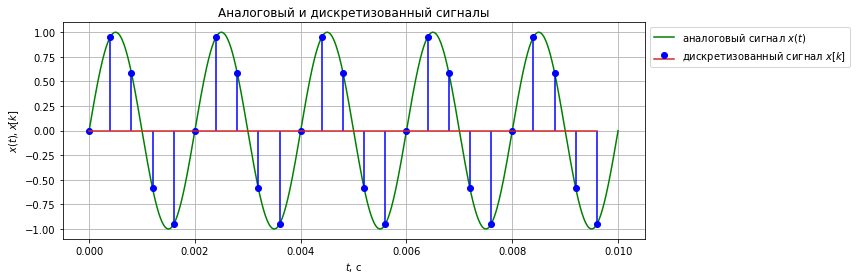

In [16]:
# Построение графиков аналогового и дискретизованного сигнала
plt.figure(figsize=[12, 4])             # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)        # создание массива времен t (1024 значения от 0 до N*fs)

plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')  
                                        # построение графика x(t) (точки соединяются линиями)
                                        # 'g' означает, что используется зеленая линия (green)
plt.stem(k/fs, x, 'b', 'bo', label='дискретизованный сигнал $x[k]$')            
                                        # построение графика функции дискретного времени x[k]
                                        # 'b', 'bo' означает, что отсчеты оборажаются синим цветом (blue)
plt.grid()                              # сетка
plt.xlabel("$t$, c")                    # подпись оси X
plt.ylabel("$x(t), x[k]$")              # подпись оси Y
plt.title("Аналоговый и дискретизованный сигналы") # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()                      # автоматическая корректировка расположения осей графика

In [17]:
# моделирование квантования дискретного сигнала
y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=num_levels)
bins=np.linspace(-1, 1, num_levels)

/tmp/ipykernel_94008/455663193.py:7: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k/fs, y, 'b', 'bo', label='цифровой сигнал $y[k]$')


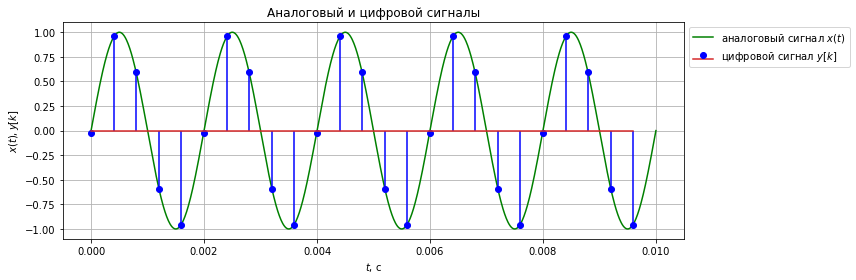

In [18]:
# Вывод графика аналогового и цифрового сигнала
plt.figure(figsize=[12, 4])                  # создание полотна размером шириной 8 X 4 дюйма
t=np.linspace(0, N/fs, num=1024)            # создание массива времен t (1024 значения от 0 до N*fs)
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')        
                                            # построение графика x(t) (точки соединяются линиями)

plt.stem(k/fs, y, 'b', 'bo', label='цифровой сигнал $y[k]$')                
                                            # построение графика функции дискретного времени y[k]
                                            # k/fs - м
    
if num_levels<21:                           # если число уровней не велико, то производится
    plt.yticks(bins)                        # установка делений шкалы оси Y, совпадающих с уровнями квантования

plt.grid()                                  # сетка
plt.xlabel("$t$, c")                        # подпись оси X
plt.ylabel("$x(t), y[k]$")                  # подпись оси Y
plt.title("Аналоговый и цифровой сигналы")  # заголовок графика
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout()                          # автоматическая корректировка расположения осей графика

### Различие аналогового, дискретного и цифрового сигнала

- Аналоговый сигнал -- обычный сигнал, функция времени, имеющая бесконечное количество значений (может принимать всевозможные значения) в пределах некоторого промежутка.
- Дискретный сигнал -- счетный набор отсчетов в заданные моменты времени $k \Delta t$, где $\Delta t$ заданное значение. Дискретный сигнал все еще может принимать любые значения в пределах заданного промежутка, но уже не является непрерывной функцией времени
- Цифровой сигнал. Дискретный сигнал, прошедший процедуру квантования. Значение такого сигнала уже не может принимать любый значения в пределах заданного промежутка. Более того, значение аналовогого и цифрового сигнала в некоторой точке $t = k \Delta t$ могут не совпадать (из-за того, что цифровой сигнал квантуется).


__Вопрос:__ не совсем понятно, чем конкретно оличаются первый и второй график. По факту, на первом графике должен быть представлен дискретный сигнал, а на другом -- цифровой. Но по факту, на глаз они почти одинаковые. Единственное, если вывести значения массивов -- они слегка отличаются, возможно y -- как раз и содержит в себе отквантованные значения, а x содержит "реальные" аналоговые значения.


##### Промоделируем более наглядный пример цифрового сигнала.

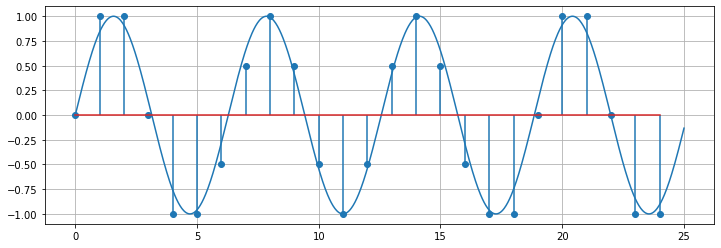

In [19]:
def f(x):
    return np.sin(x)


n = 25
plt.figure(figsize=[12, 4])

k = np.arange(n)
h = quantize_uniform(f(k), quant_min=-1, quant_max=1, quant_level=5)
plt.plot(np.linspace(0, n, 1000), f(np.linspace(0, n, 1000)))
plt.stem(k, h)
plt.grid()

## Изменение ошибки квантования с ростом числа уровней квантования

По логике с ростом числа квантований уровень ошибки должен падать. Если посмотреть на картину в целом, то именно так и происходит. Но, если посмотреть на изменения конкретного элемента, то значение скачет.

__Исправлено:__ скачки в пределах одного значения связаны со смещением этого индекса относительно сигнала. Иногда индекс попадает на высокое значение сигнала, иногда на низкое. Однако в среднем ошибка уменьшается с ростом числа уровней квантования.

##### Покажем на графике, как меняется ошибка квантования с увеличением уровня квантования

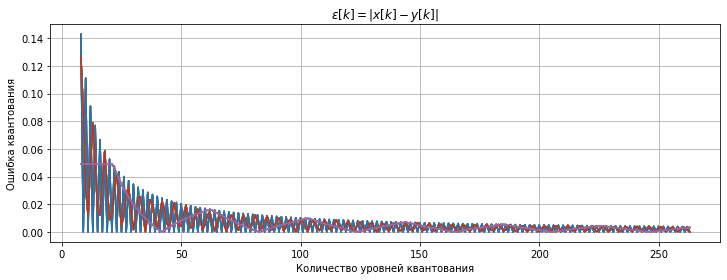

In [20]:
# массив количеств уровней квантования, на которых будем смотреть ошибку
num_levels_array = np.array(range(8,264,1))

result = []
for i in num_levels_array:
    # аналоговый сигнал
    X=np.sin(2*np.pi*(f0/fs)*k)
    # цифровой сигнал
    Y=quantize_uniform(x, quant_min=-1, quant_max=1, quant_level=i)

    # result.append(abs(X[element] - Y[element]))
    result.append(abs(X - Y))

plt.figure(figsize=[12, 4]) 
plt.plot(num_levels_array, result)
plt.xlabel("Количество уровней квантования")
plt.ylabel("Ошибка квантования")
plt.title(r'$\varepsilon[k]=|x[k]-y[k]|$')
plt.grid()

/tmp/ipykernel_94008/202620442.py:4: MatplotlibDeprecationWarning: Passing the markerfmt parameter positionally is deprecated since Matplotlib 3.5; the parameter will become keyword-only two minor releases later.
  plt.stem(k/fs, abs(x-y), 'm', 'mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")


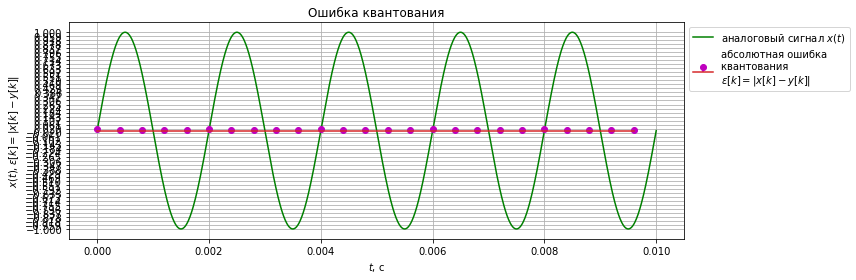

In [21]:
plt.figure(figsize=[12, 4])
plt.title("Ошибка квантования") 
plt.plot(t, np.sin(2*np.pi*f0*t), 'g', label='аналоговый сигнал $x(t)$')
plt.stem(k/fs, abs(x-y), 'm', 'mo', label="абсолютная ошибка \nквантования \n$\\epsilon[k]=|x[k]-y[k]|$")       
                                      #вывод абсолютных значений ошибки квантования для дискретного сигнала
plt.yticks(bins)
plt.grid()
plt.xlabel("$t$, c")                                          # подпись оси X
plt.ylabel("$x(t), \\varepsilon[k]=|x[k]-y[k]|$")             # подпись оси Y
plt.legend(loc='best', bbox_to_anchor=(1, 1))
plt.tight_layout() 
plt.show()